In [35]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import os

In [36]:
os.chdir('C:/Users/dai/Desktop/DAI-Aug25/ML/Datasets')
milk = pd.read_csv('milk.csv', index_col=0)
std = StandardScaler().set_output(transform='pandas')
milk_scl = std.fit_transform(milk)

In [37]:
prcomp = PCA().set_output(transform='pandas')
pca_ed = prcomp.fit_transform(milk_scl)

print('scaled dataset: \n',pca_ed.var())

eigenvalues, eigenvectors = np.linalg.eig(milk_scl.cov())
print("\nEigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)



scaled dataset: 
 pca0    4.040412
pca1    0.924372
pca2    0.134291
pca3    0.102689
pca4    0.006570
dtype: float64

Eigenvalues:
[4.0404117  0.92437238 0.00656977 0.13429088 0.1026886 ]

Eigenvectors:
[[-0.47294379  0.35285509 -0.70967042  0.36921298  0.10893632]
 [ 0.46657047  0.32094099 -0.1930657   0.15196177 -0.78672876]
 [ 0.44868269 -0.47603724 -0.66831106 -0.30699163  0.17660367]
 [-0.48289116  0.05951482 -0.11159049 -0.77642589 -0.38468756]
 [ 0.35232959  0.73643513  0.00118661 -0.378825    0.43590982]]


when we plot pca vectors on 2d this is there coords:
i doubt bro confirm from perplexity pro

In [38]:
prcomp.components_

array([[ 0.47294379, -0.46657047, -0.44868269,  0.48289116, -0.35232959],
       [ 0.35285509,  0.32094099, -0.47603724,  0.05951482,  0.73643513],
       [-0.36921298, -0.15196177,  0.30699163,  0.77642589,  0.378825  ],
       [-0.10893632,  0.78672876, -0.17660367,  0.38468756, -0.43590982],
       [ 0.70967042,  0.1930657 ,  0.66831106,  0.11159049, -0.00118661]])

In [39]:
from pca import pca
import matplotlib.pyplot as plt

[03-11-2025 10:02:53] [pca.pca] [INFO] PCA reduction performed to capture 95.0% explained variance using 5 columns of the input data.
[03-11-2025 10:02:53] [pca.pca] [INFO] Fit using PCA.
[03-11-2025 10:02:53] [pca.pca] [INFO] Compute loadings and PCs.
[03-11-2025 10:02:53] [pca.pca] [INFO] Compute explained variance.
[03-11-2025 10:02:53] [pca.pca] [INFO] Number of components is 2 that covers 95.00% explained variance.
[03-11-2025 10:02:53] [pca.pca] [INFO] The PCA reduction is performed on the 5 columns of the input dataframe.
[03-11-2025 10:02:53] [pca.pca] [INFO] Fit using PCA.
[03-11-2025 10:02:53] [pca.pca] [INFO] Compute loadings and PCs.
[03-11-2025 10:02:53] [pca.pca] [INFO] Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[03-11-2025 10:02:53] [pca.pca] [INFO] Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[03-11-2025 10:02:53] [pca.pca] [INFO] Outlier detection using SPE/DmodX with n_std=[3]
[03-11-2025 10:02:53] [pca.pca] [W

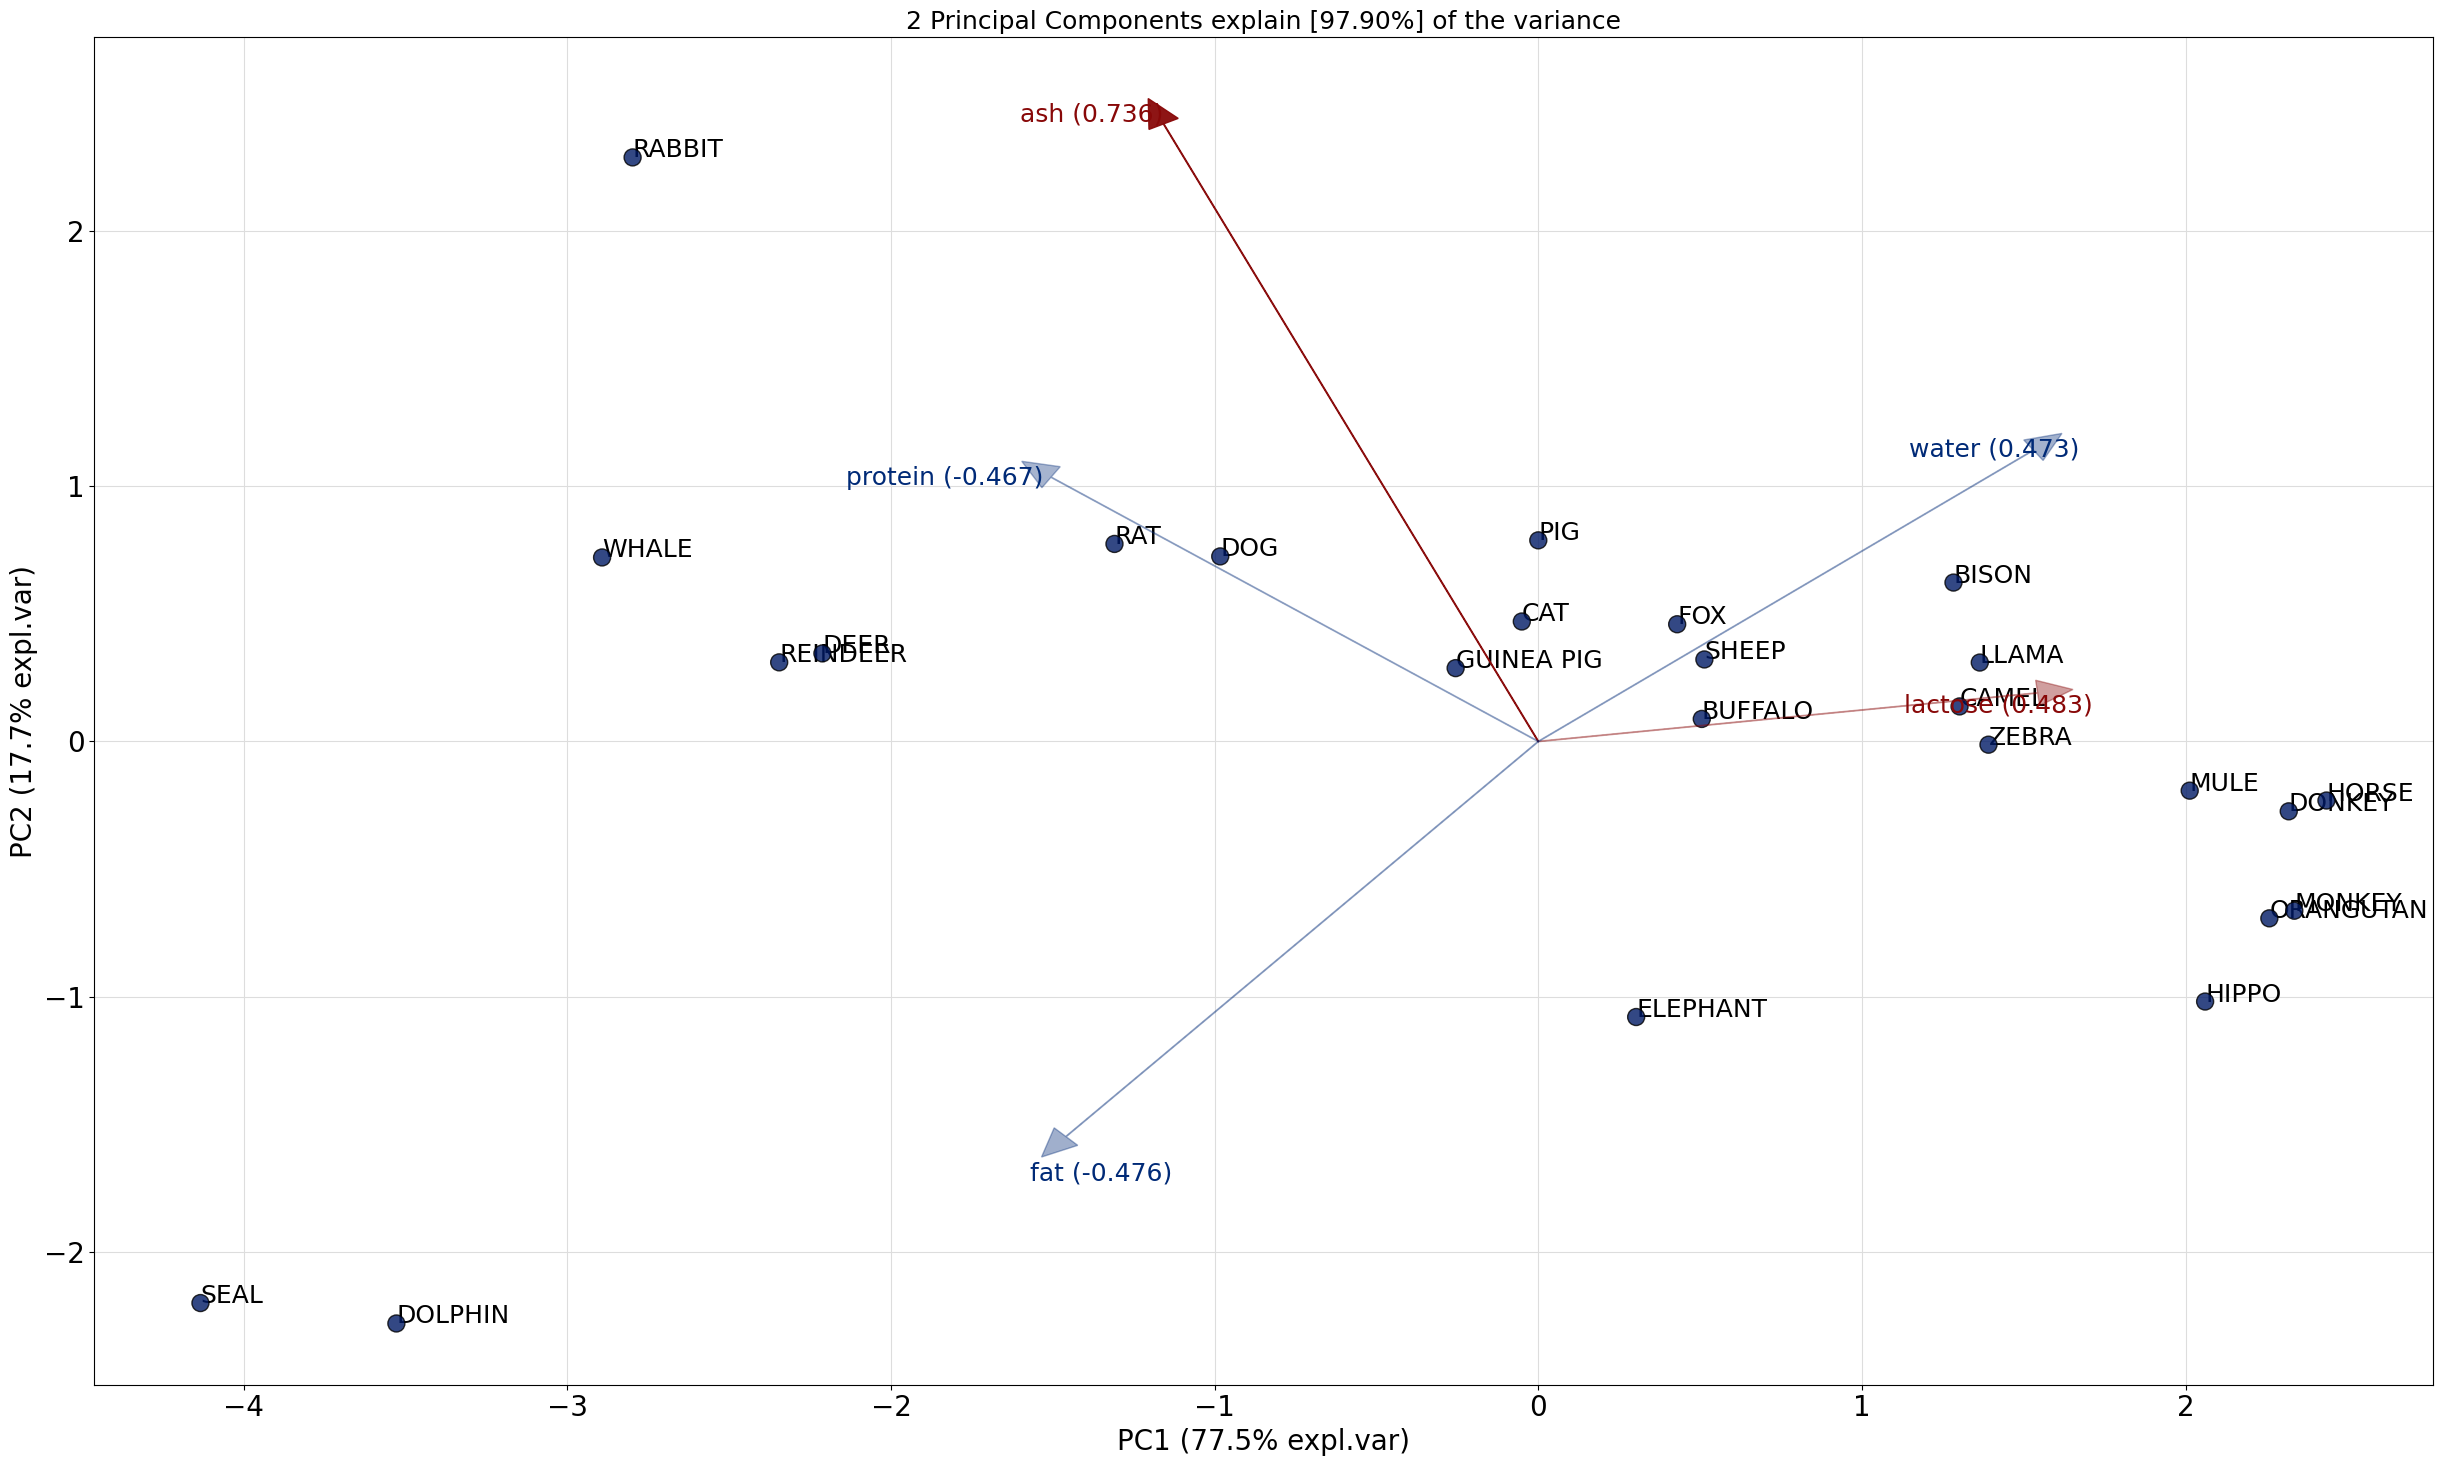

In [55]:
model = pca()
result = model.fit_transform(milk_scl, col_labels=milk.columns, row_labels=(milk.index))

model.biplot(label=True, legend=True)

for i in np.arange(0,milk.shape[0]):
    plt.text(pca_ed.values[i,0], pca_ed.values[i,1], list(milk.index)[i])
plt.tight_layout()

In [47]:

prcomp.explained_variance_

array([4.0404117 , 0.92437238, 0.13429088, 0.1026886 , 0.00656977])

In [51]:
var_arr = prcomp.explained_variance_

total_var = sum(np.array(var_arr))

proportion_array = var_arr/total_var
per_prop_array = (var_arr/total_var)*100
per_prop_array

array([77.57590469, 17.74794969,  2.57838496,  1.97162103,  0.12613963])

This can also be done as:

In [54]:
print(prcomp.explained_variance_ratio_*100)
print(np.cumsum(prcomp.explained_variance_ratio_*100))

[77.57590469 17.74794969  2.57838496  1.97162103  0.12613963]
[ 77.57590469  95.32385438  97.90223934  99.87386037 100.        ]
